### This is for automatically plot histogram based on all glue layer thickness measurements

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
str_filename = 'SM measurements.csv'
# str_module = '472-024-046'
str_module = 'All Moduels'     #By default

In [3]:
df = pd.read_csv(str_filename)
# df

Calculate glue layer thicknesses at four different positions

In [4]:
df['GL1'] = df.module_p1 - df.LYSO_p1 - df.SiPM1_p4 - df.SiPM2_p1
df['GL2'] = df.module_p2 - df.LYSO_p2 - df.SiPM1_p3 - df.SiPM2_p2
df['GL3'] = df.module_p3 - df.LYSO_p3 - df.SiPM1_p2 - df.SiPM2_p3
df['GL4'] = df.module_p4 - df.LYSO_p4 - df.SiPM1_p1 - df.SiPM2_p4

Select data

In [5]:
# df = df[df["id"] == str_module]          #Select certain module
df_G = df.loc[:,["GL1","GL2","GL3","GL4"]]*1000       #Convert from mm to μm
# df_G
# df_G.T.stack()

For different points

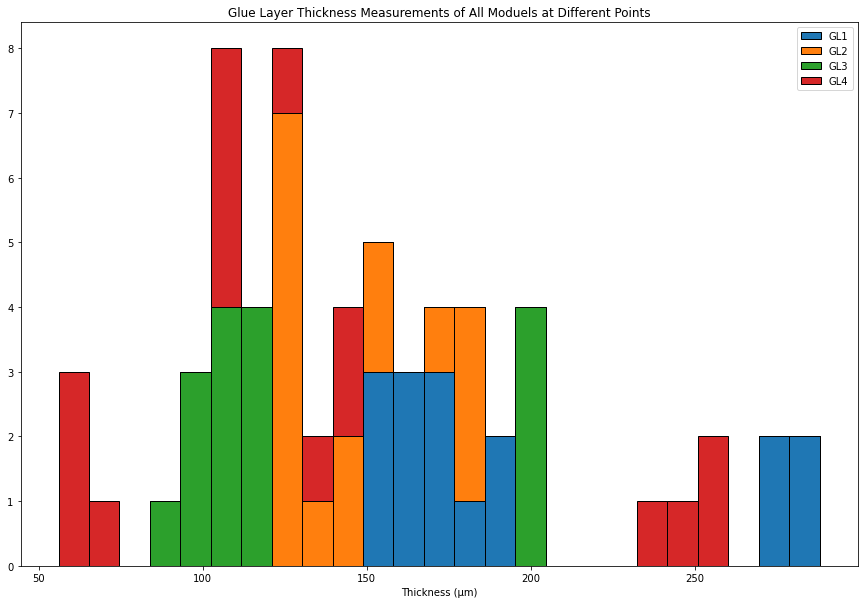

In [6]:
fig1 = plt.figure(figsize=(15,10))

#----------------different styles----------------------
# sns.histplot(df_G, kde=False, bins=25)
# sns.histplot(df_G, kde=True, bins=25)                                                                         # add fit                                                         
# sns.histplot(df_G.T.stack(), bins=25, hue_order=["GL1","GL2","GL3","GL4"], multiple="stack")                  # stacked, but not working
plt.hist(df_G, stacked=True, bins=25, edgecolor="black", linewidth=1, label=["GL1","GL2","GL3","GL4"])        # stacked
# sns.histplot(df_G, kde=False, bins=25, element = 'step', fill= False)                                         # unfilled

plt.xlabel('Thickness (μm)')
plt.title('Glue Layer Thickness Measurements of ' + str_module + ' at Different Points')
plt.legend()
plt.show()

For all points

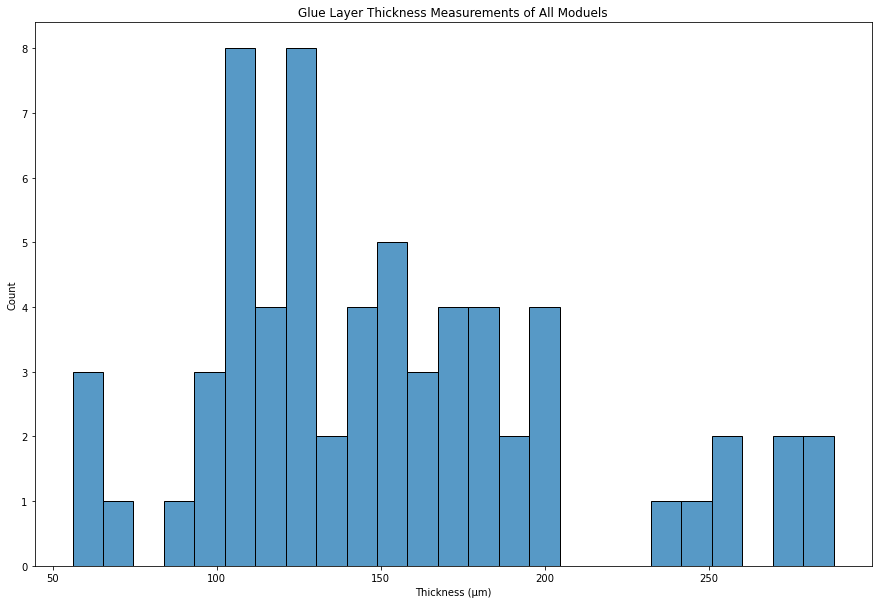

In [10]:
fig2 = plt.figure(figsize=(15,10))
sns.histplot(df_G.stack(), bins=25)
# plt.hist(df_G.stack(), bins=25)
# plt.hist(df_G.stack(), density=True, bins=25)
# df_G.stack().plot.kde(bw_method=0.1)

plt.xlabel('Thickness (μm)')
plt.ylabel('Count')
plt.title('Glue Layer Thickness Measurements of ' + str_module)
plt.show()